In [1]:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def signedAngle(u = None,v = None,n = None):
    # This function calculates the signed angle between two vectors, "u" and "v",
    # using an optional axis vector "n" to determine the direction of the angle.
    #
    # Parameters:
    #   u: numpy array-like, shape (3,), the first vector.
    #   v: numpy array-like, shape (3,), the second vector.
    #   n: numpy array-like, shape (3,), the axis vector that defines the plane
    #      in which the angle is measured. It determines the sign of the angle.
    #
    # Returns:
    #   angle: float, the signed angle (in radians) from vector "u" to vector "v".
    #          The angle is positive if the rotation from "u" to "v" follows
    #          the right-hand rule with respect to the axis "n", and negative otherwise.
    #
    # The function works by:
    # 1. Computing the cross product "w" of "u" and "v" to find the vector orthogonal
    #    to both "u" and "v".
    # 2. Calculating the angle between "u" and "v" using the arctan2 function, which
    #    returns the angle based on the norm of "w" (magnitude of the cross product)
    #    and the dot product of "u" and "v".
    # 3. Using the dot product of "n" and "w" to determine the sign of the angle.
    #    If this dot product is negative, the angle is adjusted to be negative.
    #
    # Example:
    #   signedAngle(np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1]))
    #   This would return a positive angle (π/2 radians), as the rotation
    #   from the x-axis to the y-axis is counterclockwise when viewed along the z-axis.
    w = np.cross(u,v)
    angle = np.arctan2( np.linalg.norm(w), np.dot(u,v) )
    if (np.dot(n,w) < 0):
        angle = - angle

    return angle

In [3]:
def mmt(matrix):
    return matrix + matrix.T

In [4]:
def getTheta(x0, x1 = None, x2 = None, x3 = None):

    if np.size(x0) == 12:  # Allow another type of input where x0 contains all the info
      x1 = x0[3:6]
      x2 = x0[6:9]
      x3 = x0[9:12]
      x0 = x0[0:3]

    m_e0 = x1 - x0
    m_e1 = x2 - x0
    m_e2 = x3 - x0

    n0 = np.cross(m_e0, m_e1)
    n1 = np.cross(m_e2, m_e0)

    # Calculate the signed angle using the provided function
    theta = signedAngle(n0, n1, m_e0)

    return theta

In [5]:
# In the original code, there are probaly TWO sign errors in the expressions for m_h3 and m_h4.
# [Original code: % https://github.com/shift09/plates-shells/blob/master/src/bending.cpp]
# I indicated those two corrections by writing the word "CORRECTION" next
# to them.

def gradTheta(x0, x1 = None, x2 = None, x3 = None):

    if np.size(x0) == 12:  # Allow another type of input where x0 contains all the info
      x1 = x0[3:6]
      x2 = x0[6:9]
      x3 = x0[9:12]
      x0 = x0[0:3]

    m_e0 = x1 - x0
    m_e1 = x2 - x0
    m_e2 = x3 - x0
    m_e3 = x2 - x1
    m_e4 = x3 - x1

    m_cosA1 = np.dot(m_e0, m_e1) / (np.linalg.norm(m_e0) * np.linalg.norm(m_e1))
    m_cosA2 = np.dot(m_e0, m_e2) / (np.linalg.norm(m_e0) * np.linalg.norm(m_e2))
    m_cosA3 = -np.dot(m_e0, m_e3) / (np.linalg.norm(m_e0) * np.linalg.norm(m_e3))
    m_cosA4 = -np.dot(m_e0, m_e4) / (np.linalg.norm(m_e0) * np.linalg.norm(m_e4))

    m_sinA1 = np.linalg.norm(np.cross(m_e0, m_e1)) / (np.linalg.norm(m_e0) * np.linalg.norm(m_e1))
    m_sinA2 = np.linalg.norm(np.cross(m_e0, m_e2)) / (np.linalg.norm(m_e0) * np.linalg.norm(m_e2))
    m_sinA3 = -np.linalg.norm(np.cross(m_e0, m_e3)) / (np.linalg.norm(m_e0) * np.linalg.norm(m_e3))
    m_sinA4 = -np.linalg.norm(np.cross(m_e0, m_e4)) / (np.linalg.norm(m_e0) * np.linalg.norm(m_e4))

    m_nn1 = np.cross(m_e0, m_e3)
    m_nn1 = m_nn1 / np.linalg.norm(m_nn1)
    m_nn2 = -np.cross(m_e0, m_e4)
    m_nn2 = m_nn2 / np.linalg.norm(m_nn2)

    m_h1 = np.linalg.norm(m_e0) * m_sinA1
    m_h2 = np.linalg.norm(m_e0) * m_sinA2
    m_h3 = -np.linalg.norm(m_e0) * m_sinA3  # CORRECTION
    m_h4 = -np.linalg.norm(m_e0) * m_sinA4  # CORRECTION
    m_h01 = np.linalg.norm(m_e1) * m_sinA1
    m_h02 = np.linalg.norm(m_e2) * m_sinA2

    # Initialize the gradient
    gradTheta = np.zeros(12)

    gradTheta[0:3] = m_cosA3 * m_nn1 / m_h3 + m_cosA4 * m_nn2 / m_h4
    gradTheta[3:6] = m_cosA1 * m_nn1 / m_h1 + m_cosA2 * m_nn2 / m_h2
    gradTheta[6:9] = -m_nn1 / m_h01
    gradTheta[9:12] = -m_nn2 / m_h02

    return gradTheta

In [6]:
def hessTheta(x0, x1 = None, x2 = None, x3 = None):

    if np.size(x0) == 12:  # Allow another type of input where x0 contains all the info
      x1 = x0[3:6]
      x2 = x0[6:9]
      x3 = x0[9:12]
      x0 = x0[0:3]

    m_e0 = x1 - x0
    m_e1 = x2 - x0
    m_e2 = x3 - x0
    m_e3 = x2 - x1
    m_e4 = x3 - x1

    m_cosA1 = np.dot(m_e0, m_e1) / (np.linalg.norm(m_e0) * np.linalg.norm(m_e1))
    m_cosA2 = np.dot(m_e0, m_e2) / (np.linalg.norm(m_e0) * np.linalg.norm(m_e2))
    m_cosA3 = -np.dot(m_e0, m_e3) / (np.linalg.norm(m_e0) * np.linalg.norm(m_e3))
    m_cosA4 = -np.dot(m_e0, m_e4) / (np.linalg.norm(m_e0) * np.linalg.norm(m_e4))

    m_sinA1 = np.linalg.norm(np.cross(m_e0, m_e1)) / (np.linalg.norm(m_e0) * np.linalg.norm(m_e1))
    m_sinA2 = np.linalg.norm(np.cross(m_e0, m_e2)) / (np.linalg.norm(m_e0) * np.linalg.norm(m_e2))
    m_sinA3 = -np.linalg.norm(np.cross(m_e0, m_e3)) / (np.linalg.norm(m_e0) * np.linalg.norm(m_e3))
    m_sinA4 = -np.linalg.norm(np.cross(m_e0, m_e4)) / (np.linalg.norm(m_e0) * np.linalg.norm(m_e4))

    m_nn1 = np.cross(m_e0, m_e3)
    m_nn1 /= np.linalg.norm(m_nn1)
    m_nn2 = -np.cross(m_e0, m_e4)
    m_nn2 /= np.linalg.norm(m_nn2)

    m_h1 = np.linalg.norm(m_e0) * m_sinA1
    m_h2 = np.linalg.norm(m_e0) * m_sinA2
    m_h3 = -np.linalg.norm(m_e0) * m_sinA3
    m_h4 = -np.linalg.norm(m_e0) * m_sinA4
    m_h01 = np.linalg.norm(m_e1) * m_sinA1
    m_h02 = np.linalg.norm(m_e2) * m_sinA2

    # Gradient of Theta (as an intermediate step)
    grad_theta = np.zeros((12, 1))
    grad_theta[0:3] = (m_cosA3 * m_nn1 / m_h3 + m_cosA4 * m_nn2 / m_h4).reshape(-1, 1)
    grad_theta[3:6] = (m_cosA1 * m_nn1 / m_h1 + m_cosA2 * m_nn2 / m_h2).reshape(-1, 1)
    grad_theta[6:9] = (-m_nn1 / m_h01).reshape(-1, 1)
    grad_theta[9:12] = (-m_nn2 / m_h02).reshape(-1, 1)

    # Intermediate matrices for Hessian
    m_m1 = np.cross(m_nn1, m_e1) / np.linalg.norm(m_e1)
    m_m2 = -np.cross(m_nn2, m_e2) / np.linalg.norm(m_e2)
    m_m3 = -np.cross(m_nn1, m_e3) / np.linalg.norm(m_e3)
    m_m4 = np.cross(m_nn2, m_e4) / np.linalg.norm(m_e4)
    m_m01 = -np.cross(m_nn1, m_e0) / np.linalg.norm(m_e0)
    m_m02 = np.cross(m_nn2, m_e0) / np.linalg.norm(m_e0)

    # Hessian matrix components
    M331 = m_cosA3 / (m_h3 ** 2) * np.outer(m_m3, m_nn1)
    M311 = m_cosA3 / (m_h3 * m_h1) * np.outer(m_m1, m_nn1)
    M131 = m_cosA1 / (m_h1 * m_h3) * np.outer(m_m3, m_nn1)
    M3011 = m_cosA3 / (m_h3 * m_h01) * np.outer(m_m01, m_nn1)
    M111 = m_cosA1 / (m_h1 ** 2) * np.outer(m_m1, m_nn1)
    M1011 = m_cosA1 / (m_h1 * m_h01) * np.outer(m_m01, m_nn1)

    M442 = m_cosA4 / (m_h4 ** 2) * np.outer(m_m4, m_nn2)
    M422 = m_cosA4 / (m_h4 * m_h2) * np.outer(m_m2, m_nn2)
    M242 = m_cosA2 / (m_h2 * m_h4) * np.outer(m_m4, m_nn2)
    M4022 = m_cosA4 / (m_h4 * m_h02) * np.outer(m_m02, m_nn2)
    M222 = m_cosA2 / (m_h2 ** 2) * np.outer(m_m2, m_nn2)
    M2022 = m_cosA2 / (m_h2 * m_h02) * np.outer(m_m02, m_nn2)

    B1 = 1 / np.linalg.norm(m_e0) ** 2 * np.outer(m_nn1, m_m01)
    B2 = 1 / np.linalg.norm(m_e0) ** 2 * np.outer(m_nn2, m_m02)

    N13 = 1 / (m_h01 * m_h3) * np.outer(m_nn1, m_m3)
    N24 = 1 / (m_h02 * m_h4) * np.outer(m_nn2, m_m4)
    N11 = 1 / (m_h01 * m_h1) * np.outer(m_nn1, m_m1)
    N22 = 1 / (m_h02 * m_h2) * np.outer(m_nn2, m_m2)
    N101 = 1 / (m_h01 ** 2) * np.outer(m_nn1, m_m01)
    N202 = 1 / (m_h02 ** 2) * np.outer(m_nn2, m_m02)

    # Initialize Hessian of Theta
    hess_theta = np.zeros((12, 12))

    hess_theta[0:3, 0:3] = mmt(M331) - B1 + mmt(M442) - B2
    hess_theta[0:3, 3:6] = M311 + M131.T + B1 + M422 + M242.T + B2
    hess_theta[0:3, 6:9] = M3011 - N13
    hess_theta[0:3, 9:12] = M4022 - N24
    hess_theta[3:6, 3:6] = mmt(M111) - B1 + mmt(M222) - B2
    hess_theta[3:6, 6:9] = M1011 - N11
    hess_theta[3:6, 9:12] = M2022 - N22
    hess_theta[6:9, 6:9] = -mmt(N101)
    hess_theta[9:12, 9:12] = -mmt(N202)

    # Make the Hessian symmetric
    hess_theta[3:6, 0:3] = hess_theta[0:3, 3:6].T
    hess_theta[6:9, 0:3] = hess_theta[0:3, 6:9].T
    hess_theta[9:12, 0:3] = hess_theta[0:3, 9:12].T
    hess_theta[6:9, 3:6] = hess_theta[3:6, 6:9].T
    hess_theta[9:12, 3:6] = hess_theta[3:6, 9:12].T

    return hess_theta


In [7]:
def gradEs_hessEs(node0 = None,node1 = None,l_k = None,EA = None):

# Inputs:
# node0: 1x3 vector - position of the first node
# node1: 1x3 vector - position of the last node

# l_k: reference length (undeformed) of the edge
# EA: scalar - stretching stiffness - Young's modulus times area

# Outputs:
# dF: 6x1  vector - gradient of the stretching energy between node0 and node 1.
# dJ: 6x6 vector - hessian of the stretching energy between node0 and node 1.

    ## Gradient of Es
    edge = node1 - node0

    edgeLen = np.linalg.norm(edge)
    tangent = edge / edgeLen
    epsX = edgeLen / l_k - 1
    dF_unit = EA * tangent * epsX
    dF = np.zeros((6))
    dF[0:3] = - dF_unit
    dF[3:6] = dF_unit

    ## Hessian of Es
    Id3 = np.eye(3)
    M = EA * ((1 / l_k - 1 / edgeLen) * Id3 + 1 / edgeLen * ( np.outer( edge, edge ) ) / edgeLen ** 2)

    dJ = np.zeros((6,6))
    dJ[0:3,0:3] = M
    dJ[3:6,3:6] = M
    dJ[0:3,3:6] = - M
    dJ[3:6,0:3] = - M
    return dF,dJ

In [8]:
def getEb_Shell(x0, x1=None, x2=None, x3=None, theta_bar=0, kb=1.0):
    """
    Compute the bending energy for a shell.

    Returns:
    E (scalar): Bending energy.
    """
    # Allow another type of input where x0 contains all the information
    if np.size(x0) == 12:
        x1 = x0[3:6]
        x2 = x0[6:9]
        x3 = x0[9:12]
        x0 = x0[:3]

    # Compute theta, gradient, and Hessian
    theta = getTheta(x0, x1, x2, x3)  # Replace with your getTheta function in Python
    grad = gradTheta(x0, x1, x2, x3)  # Replace with your gradTheta function in Python

    # E = 0.5 * kb * (theta-thetaBar)^2
    E = 0.5 * kb * (theta - theta_bar) ** 2

    return E

In [9]:
def gradEb_hessEb_Shell(x0, x1=None, x2=None, x3=None, theta_bar=0, kb=1.0):
    """
    Compute the gradient and Hessian of the bending energy for a shell.

    Parameters:
    x0 (array): Can either be a 3-element array (single point) or a 12-element array.
    x1, x2, x3 (arrays): Optional, 3-element arrays specifying points.
    theta_bar (float): Reference angle.
    kb (float): Bending stiffness.

    Returns:
    dF (array): Gradient of the bending energy.
    dJ (array): Hessian of the bending energy.
    """
    # Allow another type of input where x0 contains all the information
    if np.size(x0) == 12:
        x1 = x0[3:6]
        x2 = x0[6:9]
        x3 = x0[9:12]
        x0 = x0[:3]

    # Compute theta, gradient, and Hessian
    theta = getTheta(x0, x1, x2, x3)  # Replace with your getTheta function in Python
    grad = gradTheta(x0, x1, x2, x3)  # Replace with your gradTheta function in Python

    # E = 0.5 * kb * (theta-thetaBar)^2
    # F = dE/dx = 2 * (theta-thetaBar) * gradTheta
    dF = 0.5 * kb * (2 * (theta - theta_bar) * grad)

    # E = 0.5 * kb * (theta-thetaBar)^2
    # F = 0.5 * kb * (2 (theta-thetaBar) d theta/dx)
    # J = dF/dx = 0.5 * kb * [ 2 (d theta / dx) transpose(d theta/dx) +
    #       2 (theta-thetaBar) (d^2 theta/ dx^2 ) ]
    hess = hessTheta(x0, x1, x2, x3)  # Replace with your hessTheta function in Python
    dJ = 0.5 * kb * (2 * np.outer(grad, grad) + 2 * (theta - theta_bar) * hess)

    return dF, dJ

In [10]:
# Function to set equal aspect ratio for 3D plots
def set_axes_equal(ax):
    """
    Set equal aspect ratio for a 3D plot in Matplotlib.
    This function adjusts the limits of the plot to make sure
    that the scale is equal along all three axes.
    """
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    y_range = abs(y_limits[1] - y_limits[0])
    z_range = abs(z_limits[1] - z_limits[0])

    max_range = max(x_range, y_range, z_range)

    x_middle = np.mean(x_limits)
    y_middle = np.mean(y_limits)
    z_middle = np.mean(z_limits)

    ax.set_xlim3d([x_middle - max_range / 2, x_middle + max_range / 2])
    ax.set_ylim3d([y_middle - max_range / 2, y_middle + max_range / 2])
    ax.set_zlim3d([z_middle - max_range / 2, z_middle + max_range / 2])

In [11]:
def plotShell(x0, ctime):

  x1 = x0[3:6]
  x2 = x0[6:9]
  x3 = x0[9:12]
  x0 = x0[0:3]

  fig = plt.figure(1)
  clear_output()
  plt.clf()  # Clear the figure
  ax = fig.add_subplot(111, projection='3d')

  # Plot nodes
  X = np.array([x0[0], x1[0], x2[0], x0[0], x3[0], x1[0]])
  Y = np.array([x0[1], x1[1], x2[1], x0[1], x3[1], x1[1]])
  Z = np.array([x0[2], x1[2], x2[2], x0[2], x3[2], x1[2]])
  ax.plot3D(X, Y, Z, 'ko-')

  # Plot the first node with a red triangle
  ax.plot3D([X[0]], [Y[0]], [Z[0]], 'r^')

  # Set the title with current time
  ax.set_title(f't={ctime:.2f}')

  # Set axes labels
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')

  # Set equal scaling and a 3D view
  set_axes_equal(ax)
  plt.draw()  # Force a redraw of the figure

  plt.show()

In [12]:
def objfun(qOld, uOld, freeIndex, dt, tol, massVector, massMatrix,
           ks, refLen, edges,
           kb, thetaBar, hinges,
           Fg, visc):

  qNew = qOld.copy()
  ndof = len(qOld) # Number of DOFs

  iter = 0 # number of iteration
  error = 10 * tol
  # Newton Raphson
  while error > tol:

    # Bending force and jacobian
    Fb = np.zeros( ndof )
    Jb = np.zeros( (ndof,ndof) )
    # Loop over every "bending spring" or "hinge"
    for kHinge in range(hinges.shape[0]):
      node0 = hinges[kHinge, 0]
      node1 = hinges[kHinge, 1]
      node2 = hinges[kHinge, 2]
      node3 = hinges[kHinge, 3]
      x0 = qNew[ 3*node0: 3*node0 + 3]
      x1 = qNew[ 3*node1: 3*node1 + 3]
      x2 = qNew[ 3*node2: 3*node2 + 3]
      x3 = qNew[ 3*node3: 3*node3 + 3]
      ind = [3*node0, 3*node0 + 1, 3*node0 + 2,
             3*node1, 3*node1 + 1, 3*node1 + 2,
             3*node2, 3*node2 + 1, 3*node2 + 2,
             3*node3, 3*node3 + 1, 3*node3 + 2]
      dF, dJ = gradEb_hessEb_Shell(x0, x1, x2, x3, 0, kb)
      Fb[ind] -= dF
      Jb[np.ix_(ind,ind)] -= dJ

    # Stretching force and jacobian
    Fs = np.zeros( ndof )
    Js = np.zeros( (ndof,ndof) )
    for kEdge in range(edges.shape[0]):
      node0 = edges[kEdge, 0]
      node1 = edges[kEdge, 1]
      x0 = qNew[ 3*node0: 3*node0 + 3]
      x1 = qNew[ 3*node1: 3*node1 + 3]
      ind = [3*node0, 3*node0 + 1, 3*node0 + 2,
             3*node1, 3*node1 + 1, 3*node1 + 2]
      dF, dJ = gradEs_hessEs(x0, x1, refLen[kEdge], ks[kEdge])
      Fs[ind] -= dF
      Js[np.ix_(ind,ind)] -= dJ

    # Viscous force
    Fv = - visc * (qNew - qOld) / dt
    Jv = - visc / dt * np.eye(ndof)

    Forces = Fb + Fs + Fg + Fv # Sum of forces
    JForces = Jb + Js + Jv # Sum of Jacobians

    # Set up my equations of motion and calculating its residual (=0)
    f = massVector / dt * ( (qNew - qOld)/dt - uOld) - Forces # Residual of EOM
    J = massMatrix / dt ** 2 - JForces

    # Extract the free part of the f and J arrays
    f_free = f[freeIndex]
    J_free = J[np.ix_(freeIndex, freeIndex)]
    # Correction
    dq_free = np.linalg.solve(J_free, f_free)

    # Update my guess for position
    qNew[freeIndex] -= dq_free

    # Calculate error
    error = np.sum( np.abs(f_free))

    iter += 1

    print('Iter = ', iter, ' error=', error)

  uNew = (qNew - qOld) / dt
  return qNew, uNew

In [13]:
# 1. Geometry, material, and analytical Euler–Bernoulli result

l_free = 0.1          # [m] free length of the plate/beam
w      = 0.01         # [m] width
h      = 0.002        # [m] thickness
Y      = 1.0e7        # [Pa] Young's modulus
rho    = 1000.0       # [kg/m^3] density
g_mag  = 9.81         # [m/s^2] gravitational acceleration

# Cross-section properties
A = w * h                      # [m^2] cross-sectional area
I = w * h**3 / 12.0            # [m^4] second moment of area

# Uniform load per unit length (from gravity): q = ρ A g
q = rho * A * g_mag            # [N/m]

# Euler–Bernoulli tip displacement for a cantilever beam under uniform load:
# δ_EB = q l^4 / (8 Y I).
# Our plate model takes z positive upwards and gravity = (0,0,-g),
# so the tip displacement is downward (negative). We include a minus sign
# so δ_EB has the same sign convention as the plate model.
delta_EB = - q * l_free**4 / (8.0 * Y * I)

print("=== Euler–Bernoulli Beam Theory ===")
print(f"Beam length l       = {l_free:.4f} m")
print(f"Area A              = {A:.4e} m^2")
print(f"Second moment I     = {I:.4e} m^4")
print(f"Uniform load q      = {q:.4e} N/m")
print(f"δ_EB (tip, theory)  = {delta_EB:.4e} m  (negative = downward)")
print()


=== Euler–Bernoulli Beam Theory ===
Beam length l       = 0.1000 m
Area A              = 2.0000e-05 m^2
Second moment I     = 6.6667e-12 m^4
Uniform load q      = 1.9620e-01 N/m
δ_EB (tip, theory)  = -3.6788e-02 m  (negative = downward)



In [14]:
# 2. Build the plate mesh from the HW figure
dx = 0.0125
x_coords = np.array([-0.0125 + i*dx for i in range(10)])  # 10 nodes in x
y_coords = np.array([0.0, w])                             # two rows: y = 0, y = w

Nx = len(x_coords)
Ny = len(y_coords)

nodes_xyz = []
for j, y in enumerate(y_coords):
    for i, x in enumerate(x_coords):
        nodes_xyz.append([x, y, 0.0])   # flat plate: z=0 initially
nodes_xyz = np.array(nodes_xyz)
nv   = nodes_xyz.shape[0]               # number of vertices
ndof = 3 * nv                           # 3 DOFs per node

# Flatten into DOF vector qOld
qOld = nodes_xyz.reshape(-1)

print(f"Number of nodes: {nv}")
print(f"Number of DOFs : {ndof}")

# Triangulation: 2 triangles per rectangular cell
triangles = []
for i in range(Nx - 1):
    j = 0
    n00 = j * Nx + i
    n10 = j * Nx + (i + 1)
    n01 = (j + 1) * Nx + i
    n11 = (j + 1) * Nx + (i + 1)

    # Two CCW triangles per cell
    triangles.append([n00, n10, n11])
    triangles.append([n00, n11, n01])

triangles = np.array(triangles, dtype=int)
ntri = triangles.shape[0]
print(f"Number of triangles: {ntri}")

Number of nodes: 20
Number of DOFs : 60
Number of triangles: 18


In [15]:
# 3. Edges and hinges (stretching and bending)

edge_dict = {}
for t_id, tri in enumerate(triangles):
    local_edges = [(tri[0], tri[1]),
                   (tri[1], tri[2]),
                   (tri[2], tri[0])]
    for (a, b) in local_edges:
        if a > b:
            a, b = b, a
        if (a, b) not in edge_dict:
            edge_dict[(a, b)] = {"tris": [t_id]}
        else:
            edge_dict[(a, b)]["tris"].append(t_id)

edges = np.array([list(k) for k in edge_dict.keys()], dtype=int)
nedges = edges.shape[0]
print(f"Number of stretching edges: {nedges}")

hinges_list = []
for (a, b), info in edge_dict.items():
    tris_sharing = info["tris"]
    if len(tris_sharing) == 2:
        t0, t1 = tris_sharing
        tri0   = triangles[t0]
        tri1   = triangles[t1]
        c = [n for n in tri0 if n not in (a, b)][0]
        d = [n for n in tri1 if n not in (a, b)][0]
        hinges_list.append([a, b, c, d])

hinges = np.array(hinges_list, dtype=int)
nhinges = hinges.shape[0]
print(f"Number of bending hinges: {nhinges}")
print()

Number of stretching edges: 37
Number of bending hinges: 17



In [16]:
# 4. Elastic parameters for discrete plate

# Stretching stiffness per edge
refLen = np.zeros(nedges)
ks     = np.zeros(nedges)
for kEdge in range(nedges):
    node0 = edges[kEdge, 0]
    node1 = edges[kEdge, 1]
    x0 = qOld[3*node0 : 3*node0 + 3]
    x1 = qOld[3*node1 : 3*node1 + 3]
    Lk = np.linalg.norm(x1 - x0)
    refLen[kEdge] = Lk
    ks[kEdge]     = np.sqrt(3.0) / 2.0 * Y * h * (Lk**2)

# Bending stiffness 
kb = 2.0 / np.sqrt(3.0) * Y * h**3 / 12.0   # [N·m]

In [17]:
# 5. Mass, external force, and time stepping

totalTime = 5.0      # [s]
dt        = 0.001    # [s]
Nsteps    = int(totalTime / dt)

# Tolerance (for Newton in objfun)
tol = kb / 0.01 * 1.0e-3

# Approximate total mass from full plate volume (including stub)
length_total   = x_coords[-1] - x_coords[0]   # from -0.0125 to 0.1
volume_total   = length_total * w * h
totalM         = rho * volume_total
massVector     = np.zeros(ndof)
dm             = totalM / nv                   # lumped mass per node

for c in range(nv):
    ind = [3*c, 3*c+1, 3*c+2]
    massVector[ind] = dm
massMatrix = np.diag(massVector)

# Gravity acts in -z direction
g_vec = np.array([0.0, 0.0, -g_mag])
Fg = np.zeros(ndof)
for c in range(nv):
    ind = [3*c, 3*c+1, 3*c+2]
    Fg[ind] = massVector[ind] * g_vec


visc=0


In [18]:
# 6. Boundary conditions 
fixed_nodes = [i for i, xyz in enumerate(nodes_xyz) if xyz[0] <= 0.0 + 1e-12]
fixedIndex = []
for n in fixed_nodes:
    fixedIndex.extend([3*n, 3*n+1, 3*n+2])
fixedIndex = np.array(sorted(fixedIndex), dtype=int)

all_dofs  = np.arange(ndof, dtype=int)
freeIndex = np.setdiff1d(all_dofs, fixedIndex)

print("Fixed nodes (x <= 0):", fixed_nodes)
print("Number of fixed DOFs:", len(fixedIndex))
print()

Fixed nodes (x <= 0): [0, 1, 10, 11]
Number of fixed DOFs: 12



In [19]:
# 7. Time integration and δ_plate(t)

# Initial velocity
uOld = np.zeros(ndof)

# Tip nodes at the free edge x = l_free
tip_nodes = [i for i, xyz in enumerate(nodes_xyz) if abs(xyz[0] - l_free) < 1e-12]
if len(tip_nodes) != 2:
    print("WARNING: expected 2 tip nodes at x = l_free, found:", tip_nodes)

# Tip z at t = 0 (centerline of free edge ≈ average of two tip nodes)
z_tip0 = np.mean([qOld[3*n + 2] for n in tip_nodes])

time_array  = np.zeros(Nsteps)
delta_plate = np.zeros(Nsteps)   # δ_plate(t) = z_tip(t) - z_tip(0)

ctime = 0.0
q_current = qOld.copy()
u_current = uOld.copy()

for step in range(Nsteps):
    print(f"Time step {step+1}/{Nsteps}, t = {ctime:.3f} s")

    q_new, u_new = objfun(
        q_current,
        u_current,
        freeIndex,
        dt,
        tol,
        massVector,
        massMatrix,
        ks,
        refLen,
        edges,
        kb,
        0.0,        # thetaBar = 0 (initially flat plate)
        hinges,
        Fg,
        visc
    )

    ctime += dt

    # Update state
    q_current = q_new.copy()
    u_current = u_new.copy()

    # Tip displacement at centerline of free edge (approx. by averaging two tip nodes)
    z_tip = np.mean([q_current[3*n + 2] for n in tip_nodes])
    delta_plate[step] = z_tip - z_tip0           # δ_plate(t)
    time_array[step]  = ctime

# Steady state (last time step)
delta_plate_steady = delta_plate[-1]

print("\n=== Comparison with Euler–Bernoulli Beam Theory ===")
print(f"δ_plate (steady, simulation) = {delta_plate_steady:.6e} m")
print(f"δ_EB    (theory)             = {delta_EB:.6e} m")

abs_diff   = delta_plate_steady - delta_EB
norm_diff  = np.abs(abs_diff) / np.abs(delta_EB)

print(f"Absolute difference          = {abs_diff:.6e} m")
print(f"Normalized difference        = {norm_diff:.6e}")
print("  (normalized difference = |δ_plate - δ_EB| / |δ_EB| )")
print()

Time step 1/5000, t = 0.000 s
Iter =  1  error= 0.017658000000000004
Iter =  2  error= 1.1603354543361361e-06
Time step 2/5000, t = 0.001 s
Iter =  1  error= 0.034253767275547006
Iter =  2  error= 3.409986137559715e-06
Time step 3/5000, t = 0.002 s
Iter =  1  error= 0.04999735039021168
Iter =  2  error= 6.9303564058153504e-06
Time step 4/5000, t = 0.003 s
Iter =  1  error= 0.06509981534402717
Iter =  2  error= 1.1838750938338932e-05
Time step 5/5000, t = 0.004 s
Iter =  1  error= 0.0796942657633925
Iter =  2  error= 1.8145552117932235e-05
Time step 6/5000, t = 0.005 s
Iter =  1  error= 0.09385338352275563
Iter =  2  error= 2.463150046529124e-05
Time step 7/5000, t = 0.006 s
Iter =  1  error= 0.10762089123650159
Iter =  2  error= 3.207388781581689e-05
Time step 8/5000, t = 0.007 s
Iter =  1  error= 0.12102992097937121
Iter =  2  error= 4.028596904087513e-05
Time step 9/5000, t = 0.008 s
Iter =  1  error= 0.13410945053892837
Iter =  2  error= 4.8743447403766986e-05
Time step 10/5000, t =

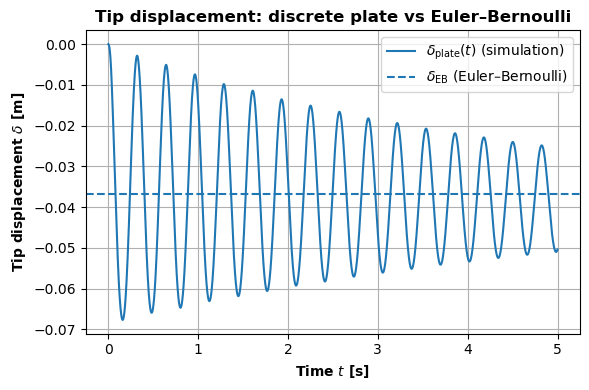

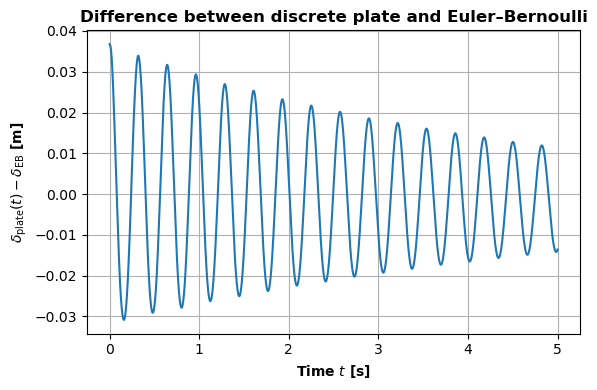

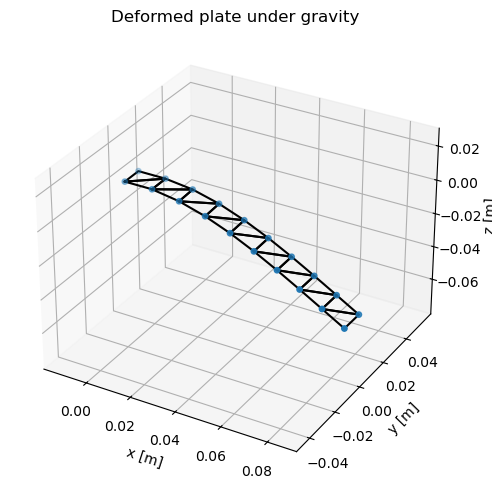

In [20]:
# Plot 1: simulation vs theory on the same graph ---
plt.figure(figsize=(6,4))
plt.plot(time_array, delta_plate,
         label=r'$\delta_{\mathrm{plate}}(t)$ (simulation)')
plt.axhline(delta_EB, linestyle='--',
            label=r'$\delta_{\mathrm{EB}}$ (Euler–Bernoulli)')

plt.xlabel(r'Time $t$ [s]', fontweight='bold')
plt.ylabel(r'Tip displacement $\delta$ [m]', fontweight='bold')
plt.title('Tip displacement: discrete plate vs Euler–Bernoulli', fontweight='bold')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: difference δ_plate(t) - δ_EB vs time
err = delta_plate - delta_EB

plt.figure(figsize=(6,4))
plt.plot(time_array, err)
plt.xlabel(r'Time $t$ [s]', fontweight='bold')
plt.ylabel(r'$\delta_{\mathrm{plate}}(t) - \delta_{\mathrm{EB}}$ [m]', fontweight='bold')
plt.title('Difference between discrete plate and Euler–Bernoulli', fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

# Deformed shape plot 
def plot_plate_mesh(q_vec, triangles, title="Deformed plate under gravity"):
    nv_local = q_vec.size // 3
    coords   = q_vec.reshape((nv_local, 3))

    fig = plt.figure(figsize=(6,5))
    ax  = fig.add_subplot(111, projection='3d')

    # Plot triangle edges
    for tri in triangles:
        pts = coords[tri]
        X   = np.append(pts[:,0], pts[0,0])
        Y   = np.append(pts[:,1], pts[0,1])
        Z   = np.append(pts[:,2], pts[0,2])
        ax.plot(X, Y, Z, 'k-')

    ax.scatter(coords[:,0], coords[:,1], coords[:,2], s=15)

    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    ax.set_zlabel("z [m]")
    ax.set_title(title)

    # Make axes roughly equal
    def set_axes_equal(ax):
        x_limits = ax.get_xlim3d()
        y_limits = ax.get_ylim3d()
        z_limits = ax.get_zlim3d()
        x_range  = abs(x_limits[1] - x_limits[0])
        y_range  = abs(y_limits[1] - y_limits[0])
        z_range  = abs(z_limits[1] - z_limits[0])
        max_range = max(x_range, y_range, z_range)
        x_mid = np.mean(x_limits)
        y_mid = np.mean(y_limits)
        z_mid = np.mean(z_limits)
        ax.set_xlim3d([x_mid - max_range/2, x_mid + max_range/2])
        ax.set_ylim3d([y_mid - max_range/2, y_mid + max_range/2])
        ax.set_zlim3d([z_mid - max_range/2, z_mid + max_range/2])

    set_axes_equal(ax)
    plt.tight_layout()
    plt.show()
plot_plate_mesh(q_current, triangles)
